# ToD Station Data
We will try to manipulate the station data set and also produce isochrome maps. First improting libraires required for manipulaitng geodata and working with osmx.

In [1]:
import pandas as pd
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Reading station data. This is a geojson file downloaded from [California GIS database](https://gis.data.ca.gov/datasets/63697b01616b4df68e2b316e73d7a4d6/explore?filters=eyJDT01NX05FVFdPIjpbIkJBUlQiXX0%3D&location=37.828312%2C-122.221573%2C12.57&showTable=true)

In [3]:
cstations = gpd.read_file("Dataweek4/California_Rail_Stations.geojson")

Doing basic checks with the data

In [4]:
type(cstations)

geopandas.geodataframe.GeoDataFrame

In [5]:
cstations.shape

(292, 18)

In [6]:
cstations.head()

,OBJECTID,LOCATION,STATION,CODE,ADDRESS,ZIP,PASS_OP,PASS_NETWO,COMM_OP,COMM_NETWO,BUS_ROUTES,TRANSIT,AIRPORT,STATION_TY,INTERMODAL,DIST,CO,geometry
0,1,Parking Garage,MONTEREY - Parking Garage,-,"Tyler, between Del Monte & Franklin",93940,,,,,55,,,2,0,5,MON,POINT (-121.89330 36.60033)
1,2,El Segundo,EL SEGUNDO,ESG,700 South Douglas Street,90245,,,,,1c,,,2,0,7,LA,POINT (-118.38342 33.90512)
2,3,Morgan Hill,MORGAN HILL,MHC,17200 Depot Street,95037,,,PCJPB,Caltrain,55,,,3,1,4,SCL,POINT (-121.65053 37.12966)
3,4,Amtrak Station,OAKLAND COLISEUM,OAC,700 Seventy-third Avenue,94621,Amtrak,Capitol Corridor,,,,"AC Transit,BART",AirBART connector to OAK,6,1,4,ALA,POINT (-122.19820 37.75252)
4,5,Amtrak Station,SANTA BARBARA,SBA,209 State Street,93101,Amtrak,"Coast Starlight,Pacific Surfliner",,,"4,10,17,21",Santa Barbara MTD,,5,1,5,SB,POINT (-119.69260 34.41430)


This looks like a pretty clean dataset. Let us look at the columns

In [8]:
cstations.columns.to_list()

['OBJECTID',
 'LOCATION',
 'STATION',
 'CODE',
 'ADDRESS',
 'ZIP',
 'PASS_OP',
 'PASS_NETWO',
 'COMM_OP',
 'COMM_NETWO',
 'BUS_ROUTES',
 'TRANSIT',
 'AIRPORT',
 'STATION_TY',
 'INTERMODAL',
 'DIST',
 'CO',
 'geometry']

We only need geometry details of select 4 station fromt this list of 245 stops. Here I attempt to find to a spatial merge of this data with a zip code data for Alameda county. My logic is that since stops are Hopefully, it will work.

In [10]:
azip = gpd.read_file('Dataweek4/Zip_Code_Boundaries.geojson')

In [11]:
azip.head()

,OBJECTID,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,SHAPE_Length,SHAPE_Area,geometry
0,1,94502,Alameda,CA,14117,5669.48,2.49,0.121167,0.000659,"MULTIPOLYGON (((-122.22677 37.74798, -122.2268..."
1,2,94577,San Leandro,CA,48666,5993.35,8.12,0.394127,0.002148,"MULTIPOLYGON (((-122.12165 37.72974, -122.1217..."
2,3,94579,San Leandro,CA,20237,6528.06,3.10,0.176203,0.000821,"MULTIPOLYGON (((-122.13297 37.69046, -122.1331..."
3,4,94603,Oakland,CA,33241,11957.19,2.78,0.181344,0.000736,"MULTIPOLYGON (((-122.14867 37.74088, -122.1487..."
4,5,94605,Oakland,CA,42375,4848.40,8.74,0.294314,0.002315,"MULTIPOLYGON (((-122.12917 37.77135, -122.1284..."


In [12]:
list(azip)

['OBJECTID',
 'ZIP_CODE',
 'PO_NAME',
 'STATE',
 'POPULATION',
 'POP_SQMI',
 'SQMI',
 'SHAPE_Length',
 'SHAPE_Area',
 'geometry']

Performing the spatial merge. We put the point-geometry dataframe to the left, and polygon to the right. Let us see if this works.

In [13]:
bstations = cstations.sjoin(azip, how="inner", predicate='intersects')


AttributeError: 'GeoDataFrame' object has no attribute 'sjoin'

Let us try this gain, but this time we remove all unessary columns in the zipcode dataframe.  

In [14]:
to_keep = ['ZIP_CODE','PO_NAME','geometry']

In [15]:
azip=azip[to_keep]

In [16]:
azip.head()

,ZIP_CODE,PO_NAME,geometry
0,94502,Alameda,"MULTIPOLYGON (((-122.22677 37.74798, -122.2268..."
1,94577,San Leandro,"MULTIPOLYGON (((-122.12165 37.72974, -122.1217..."
2,94579,San Leandro,"MULTIPOLYGON (((-122.13297 37.69046, -122.1331..."
3,94603,Oakland,"MULTIPOLYGON (((-122.14867 37.74088, -122.1487..."
4,94605,Oakland,"MULTIPOLYGON (((-122.12917 37.77135, -122.1284..."


In [17]:
bstations = cstations.sjoin(azip, how="inner", predicate='intersects')

AttributeError: 'GeoDataFrame' object has no attribute 'sjoin'

We again get an attribute error, to which I was unable to find a solution. I need to rethink the logic and the code. Given that this is not essential and that I have other work to do, let us leave this here for now and seek help during the scheduled office hours next thursday.

# Isochorne mapping


In [18]:
station_1 = 'Fruitvale Transit Village Phase II, Fruitvale, Oakland, Alameda County, California, United States'
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 # travel distance per minute

In [19]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# download the street network
st1 = ox.graph_from_address(station_1, network_type=network_type, dist = 1700)

CPU times: user 4.17 s, sys: 85.6 ms, total: 4.26 s
Wall time: 10.8 s


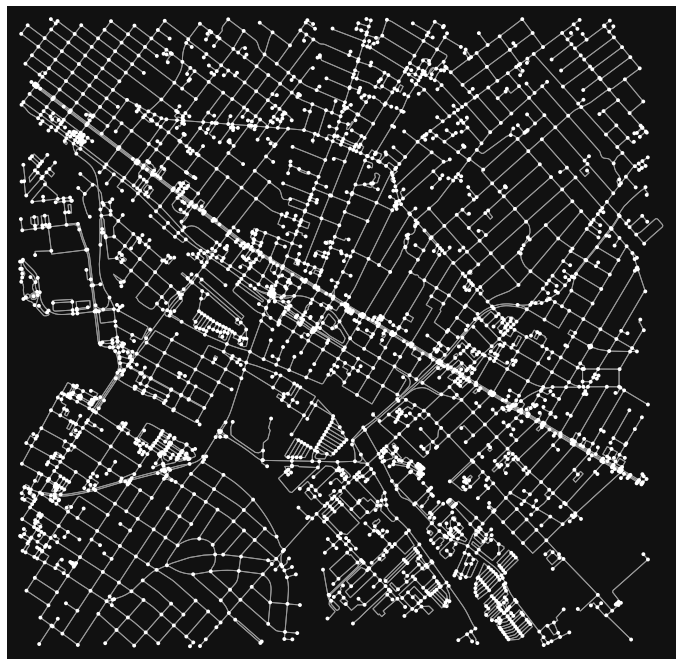

In [21]:
# quick plot using oxmnx
fig, ax = ox.plot_graph(st1,figsize=(12,12))

In [22]:
# project our network data to Web Mercator (measurements are in meters)
st1 = ox.project_graph(st1, to_crs='epsg:3857')

In [23]:
# convert nodes and edges to geodataframes
st1_n, st1_e = ox.graph_to_gdfs(st1)

In [24]:
st1_n.sample(5)

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
4930218817,4.546693e+06,-1.360520e+07,3,-122.217620,37.767927,NaN,POINT (-13605203.180 4546693.300)
53079880,4.548103e+06,-1.360404e+07,4,-122.207150,37.777939,NaN,POINT (-13604037.687 4548103.404)
4974926182,4.546089e+06,-1.360422e+07,3,-122.208829,37.763632,NaN,POINT (-13604224.604 4546088.586)
5479103852,4.547442e+06,-1.360531e+07,3,-122.218610,37.773241,NaN,POINT (-13605313.420 4547441.669)
264796901,4.547512e+06,-1.360722e+07,4,-122.235712,37.773741,NaN,POINT (-13607217.217 4547512.113)


<AxesSubplot:>

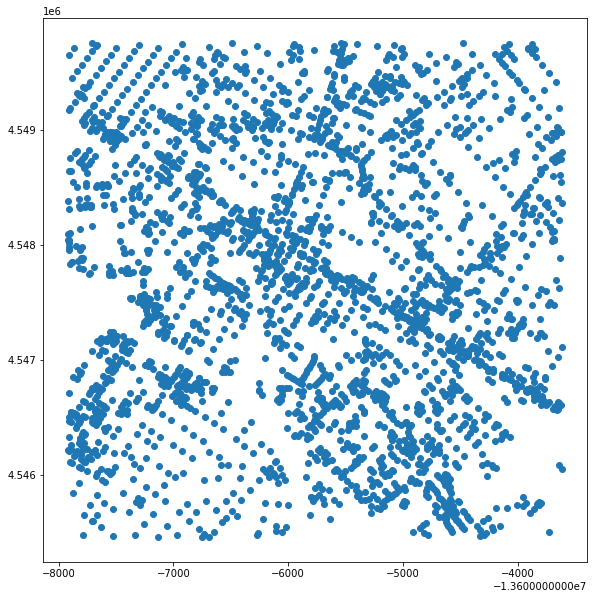

In [25]:
st1_n.plot(figsize=(10,10))

<AxesSubplot:>

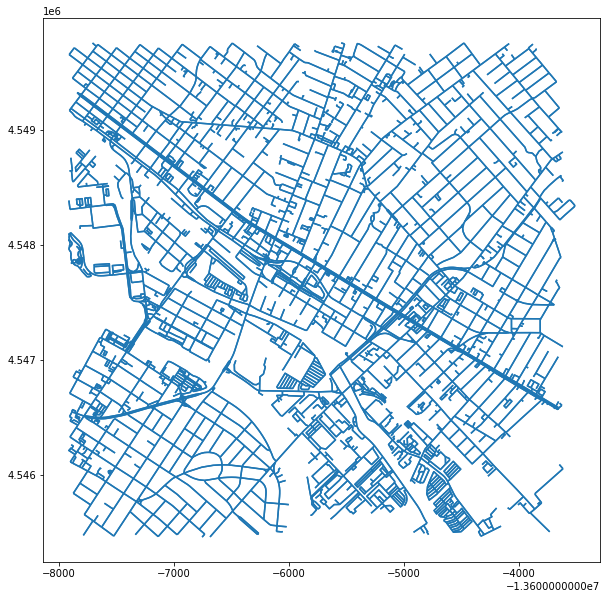

In [26]:
st1_e.plot(figsize=(10,10))